In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
df = pd.read_csv('../data/gurgaon_properties_missing_value_imputation.csv')

In [15]:
df.shape

(3680, 18)

In [16]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,raheja navodaya,sector 92,0.62,4806.0,2,2,2,5.0,New Property,1498.0,0,0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,4,4,3+,0.0,Moderately Old,5350.0,0,0,0,0,0,0,63
2,flat,signature global synera,sector 81,0.50,7886.0,2,2,1,11.0,New Property,704.0,0,0,0,0,0,2,97
3,flat,ss the leaf,sector 85,2.05,7290.0,4,4,3+,4.0,Relatively New,2500.0,0,1,0,0,0,1,49
4,flat,m3m heights,sector 65,1.99,15794.0,2,2,2,26.0,Relatively New,1140.0,0,0,0,0,0,0,48


In [17]:
latlong = pd.read_csv('../data/latlong.csv')

In [18]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [19]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [20]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [21]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [22]:
new_df = df.merge(latlong, on='sector')

In [23]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [24]:
group_df = (
    new_df
    .groupby("sector")
    [['price','price_per_sqft','built_up_area','latitude','longitude']]
    .mean()
)

In [25]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.673125,10646.705357,1538.294643,28.4750,76.9715
sector 103,1.441556,7424.555556,1804.533333,28.4949,76.9845
...,...,...,...,...,...
sector 92,1.012952,6073.447619,1598.068381,28.4079,76.9153
sector 93,0.808182,8516.363636,941.272727,28.4153,76.9326
sector 95,0.486610,5595.305085,1011.694915,28.4172,76.9081


In [26]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9832\603107827.py:1: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',


In [27]:
new_df.to_csv('data_viz1.csv',index=False)

In [29]:
df1 = pd.read_csv('../data/gurgaon_properties.csv')

In [30]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 92 Gurgaon,flat,raheja navodaya,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,not available,"Sector 92 Gurgaon, Gurgaon, Haryana",5.0,NaN,0 to 1 Year Old,"['NH8', 'Dwarka Expressway', 'IMT Manesar', 'Y...",Brand new residential apartment for sell.Locat...,[],NaN,"['Management4 out of 5', 'Green Area5 out of 5..."
1,4 BHK Flat in Gwal Pahari,flat,paras quartier,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,not available,"Paras Quartier, Valley View Estate, Gwal Pahar...",0.0,NaN,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'South point Ma...","New apartment, lush green aravalli valley 270 ...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN
2,2 BHK Flat in Sector 81 Gurgaon,flat,signature global synera,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,not available,"Sector 81 Gurgaon, Gurgaon, Haryana",11.0,East,0 to 1 Year Old,"['Sapphire 83 Mall', 'Delhi Jaipur Expressway'...",Looking for a 2 bhk property for sale in gurga...,"['1 Water Purifier', '3 Fan', '1 Fridge', '1 E...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management3.5 out of 5', 'Green Area4 out of..."
3,4 BHK Flat in Sector 85 Gurgaon,flat,ss the leaf,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,servant room,"1111, Sector 85 Gurgaon, Gurgaon, Haryana",4.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...",This lovely 4 bhk apartment/flat in sector 85 ...,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area4.5 out of 5', 'Construction4.5 ou..."
4,2 BHK Flat in Sector 65 Gurgaon,flat,m3m heights,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,not available,"Sector 65 Gurgaon, Gurgaon, Haryana",26.0,NaN,2023-12-01 00:00:00,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mal...",We are the proud owners of this 2 bhk apartmen...,[],NaN,"['Environment4 out of 5', 'Safety4 out of 5', ..."


In [31]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [32]:
wordcloud_df.head()

,features,sector
0,NaN,sector 92
1,NaN,gwal pahari
2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 81
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 85
4,NaN,sector 65


In [33]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [34]:
main

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Lift(s)',
 'Water purifier',
 'High Ceiling Height',
 'Maintenance Staff',
 'Water Storage',
 'Recently Renovated',
 'Visitor Parking',
 'Park',
 'Security Personnel',
 'Airy Rooms',
 'Spacious Interiors',
 'Shopping Centre',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Power Back-up',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Security Personnel',
 'Shopping Centre',
 'Club house / Community Center',
 'Rain Water Harvesting',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Private Garden / Terrace',
 'Maintenance Staff',
 'Wat

In [35]:
from wordcloud import WordCloud

In [36]:
feature_text = ' '.join(main)

In [37]:
import pickle
pickle.dump(feature_text, open('../model/feature_text.pkl', 'wb'))

In [38]:
feature_text

'Security / Fire Alarm Feng Shui / Vaastu Compliant Lift(s) Water purifier High Ceiling Height Maintenance Staff Water Storage Recently Renovated Visitor Parking Park Security Personnel Airy Rooms Spacious Interiors Shopping Centre Waste Disposal Rain Water Harvesting Club house / Community Center Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Power Back-up Security / Fire Alarm Intercom Facility Lift(s) Swimming Pool Maintenance Staff Water Storage Park Security Personnel Shopping Centre Club house / Community Center Rain Water Harvesting Feng Shui / Vaastu Compliant Security / Fire Alarm Private Garden / Terrace Maintenance Staff Water Storage Park Visitor Parking Shopping Centre Fitness Centre / GYM Waste Disposal Swimming Pool Piped-gas Security Personnel Internet/wi-fi connectivity Fitness Centre / GYM Club house / 

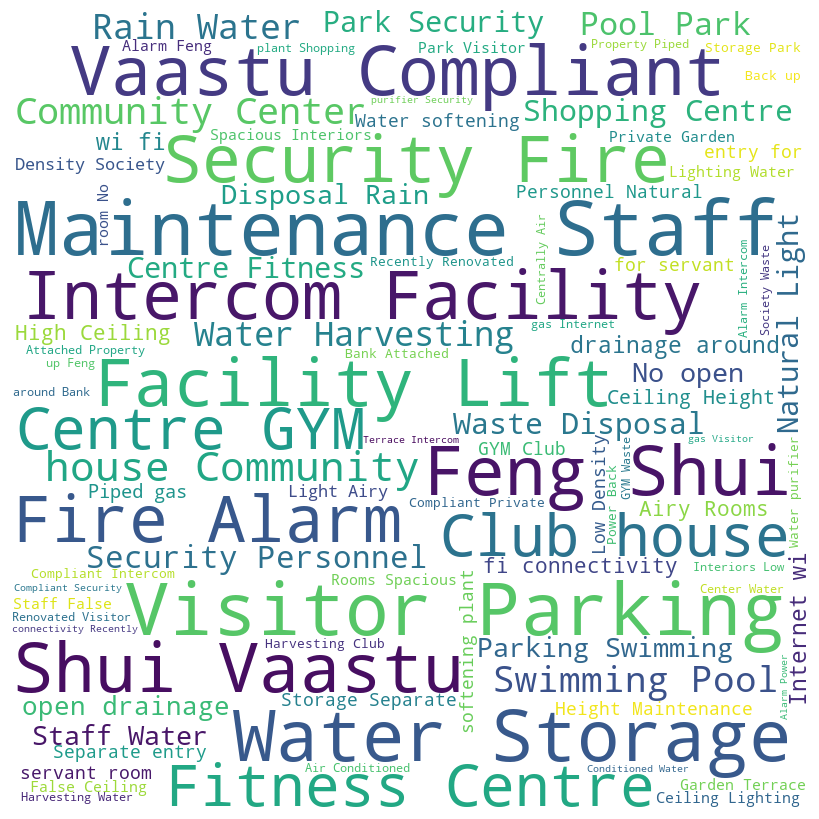

In [39]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [40]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [41]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [42]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [43]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9832\2436242274.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9832\2436242274.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

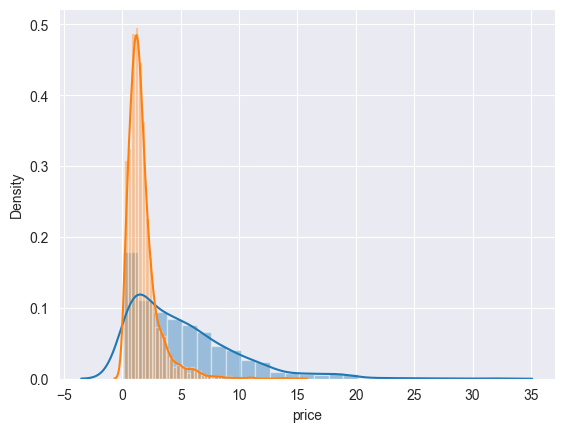

In [44]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [45]:
new_df['sector'].unique().tolist().insert(0,'overall')